## Fetching the data from db

In [19]:
import importlib
import utils2

importlib.reload(utils2)
from utils2 import *

In [2]:
all_data = aggregate_joular_node_entity_by_value("spring-boot", 25, excluded_words="testsupport|Test")

-------------------------------------
Aggregation of the JoularNodeEntities
-------------------------------------
Number of documents : 50



## Outliers removal and distribution of all the values

Removing all outliers from the data, using the z-score method

In [3]:
all_data_without_outliers = removeOutliers(all_data)

---------------
Remove outliers
---------------
Len without outliers (with at least 25 values) :  48



### Shapiro-Wilk test

Testing all data without outliers to see which ones follow a normal distribution and which ones do not.

In [4]:
all_normal_data_without_outliers = removeNonNormalData(all_data_without_outliers)

-----------------
Shapiro-Wilk test
-----------------
Number of normal distributions :  27



### Boxplot of the normal distributions without outliers

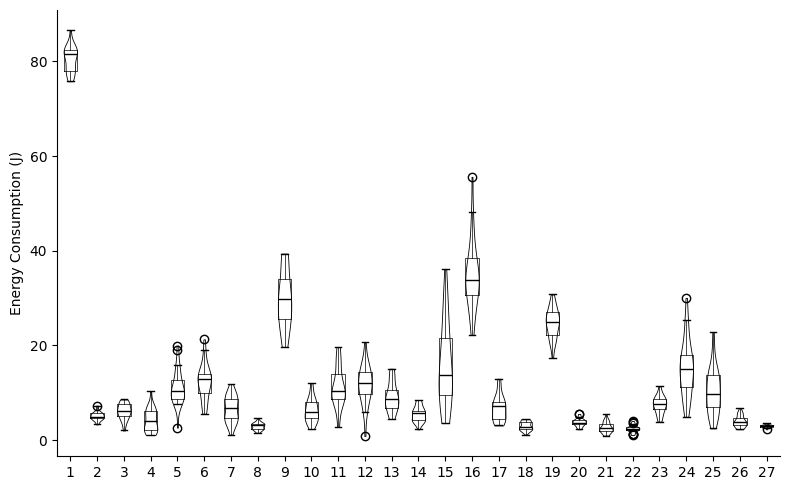

In [5]:
normal_values = [doc["values"] for doc in all_normal_data_without_outliers]
#labels = [doc["measurableElement"]["classMethodSignature"] for doc in all_normal_data_without_outliers]
violin_and_boxplot(normal_values)

#### Highest distributions

org.springframework.boot.AbstractApplicationEnvironmentTests.propertyResolverIsOptimizedForConfigurationProperties 59
org.springframework.boot.ApplicationEnvironmentTests.createEnvironment 30
org.springframework.boot.ApplicationEnvironment.<init> 29



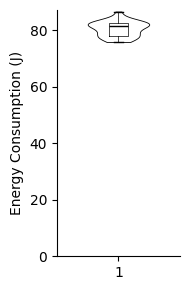

org.springframework.boot.cloud.cloudfoundry.CloudFoundryVcapEnvironmentPostProcessorTests.testServiceProperties 101
org.springframework.boot.cloud.CloudFoundryVcapEnvironmentPostProcessor.postProcessEnvironment 126
org.springframework.boot.cloud.CloudFoundryVcapEnvironmentPostProcessor.getPropertiesFromApplication 150
org.springframework.boot.json.JacksonJsonParser.parseMap 56
org.springframework.boot.json.AbstractJsonParser.tryParse 53
org.springframework.boot.json.JacksonJsonParser.lambda$parseMap$0 56
org.springframework.boot.json.JacksonJsonParser.getObjectMapper 66



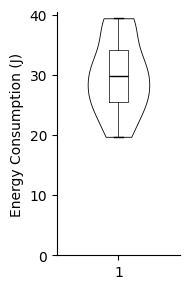

org.springframework.boot.testsupport.classpath.ModifiedClassPathExtension.interceptTestMethod 76
org.springframework.boot.testsupport.classpath.ModifiedClassPathExtension.interceptMethod 103
org.springframework.boot.testsupport.classpath.ModifiedClassPathExtension.runTest 118
org.springframework.boot.testsupport.classpath.ModifiedClassPathExtension.interceptTestMethod 76
org.springframework.boot.testsupport.classpath.ModifiedClassPathExtension.interceptMethod 88
org.springframework.boot.validation.MessageInterpolatorFactoryWithoutElIntegrationTests.getObjectShouldUseFallback 51
org.springframework.boot.validation.MessageInterpolatorFactory.getObject 70
org.springframework.boot.validation.MessageInterpolatorFactory.getMessageInterpolator 79



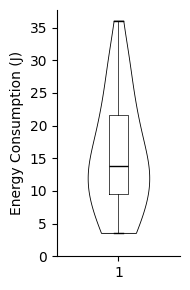

org.springframework.boot.web.client.ClientHttpRequestFactoriesTests.getOfOkHttpFactoryReturnsOkHttpFactory 73
org.springframework.boot.web.client.ClientHttpRequestFactories.get 127
org.springframework.boot.web.client.ClientHttpRequestFactories$OkHttp.get 207
org.springframework.boot.web.client.ClientHttpRequestFactories$OkHttp.createRequestFactory 226



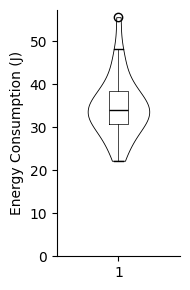

org.springframework.boot.SpringApplicationTests.environmentIsConvertedIfTypeDoesNotMatch 1067
org.springframework.boot.SpringApplication.run 315
org.springframework.boot.SpringApplication.refreshContext 439
org.springframework.boot.SpringApplication.refresh 737
org.springframework.boot.web.reactive.context.ReactiveWebServerApplicationContext.refresh 66
org.springframework.boot.web.reactive.context.ReactiveWebServerApplicationContext.onRefresh 81
org.springframework.boot.web.reactive.context.ReactiveWebServerApplicationContext.createWebServer 96
org.springframework.boot.web.reactive.context.WebServerManager.<init> 50
org.springframework.boot.web.embedded.netty.NettyReactiveWebServerFactory.getWebServer 71
org.springframework.boot.web.embedded.netty.NettyReactiveWebServerFactory.createHttpServer 161



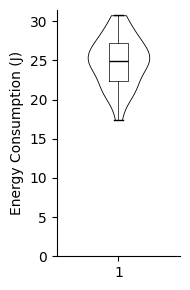

/home/jerome/Documents/Assistant/Recherche/joular-scripts/sentinel-notebook/utils2.py:314: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


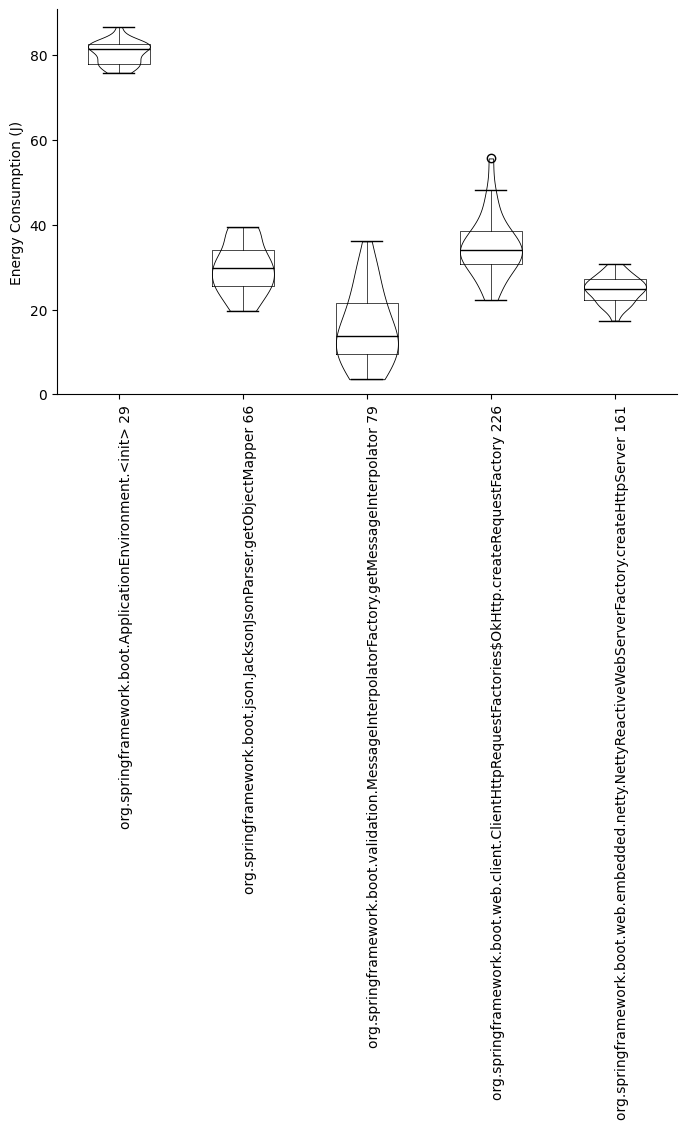

In [ ]:
import importlib
import utils2
importlib.reload(utils2)
from utils2 import *

plot_quantile_data(all_normal_data_without_outliers, 17, highest=True, save=False)

#### Lowest distributions

org.springframework.boot.jdbc.DataSourceBuilderTests.buildWhenSqlServerTypeSpecifiedReturnsExpectedDataSource 253
org.springframework.boot.jdbc.DataSourceBuilder.build 172
org.springframework.boot.jdbc.DataSourceBuilder$DataSourceProperties.forType 334
org.springframework.boot.jdbc.DataSourceBuilder$ReflectionDataSourceProperties.<init> 536
org.springframework.boot.jdbc.DataSourceBuilder$DataSourceProperty.findGetter 306
org.springframework.boot.jdbc.DataSourceBuilder$DataSourceProperty.findMethod 312



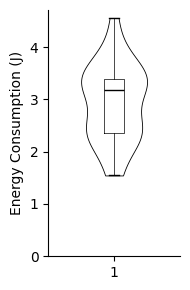

org.springframework.boot.web.embedded.jetty.SslServerCustomizerTests.whenHttp2IsNotEnabledServerConnectorHasSslAndHttpConnectionFactories 57
org.springframework.boot.web.embedded.jetty.SslServerCustomizerTests.createCustomizedServer 126
org.springframework.boot.web.embedded.jetty.SslServerCustomizerTests.createCustomizedServer 132
org.springframework.boot.web.embedded.jetty.SslServerCustomizerTests.createCustomizedServer 138
org.springframework.boot.web.embedded.jetty.SslServerCustomizer.customize 75
org.springframework.boot.web.embedded.jetty.SslServerCustomizer.createConnector 80



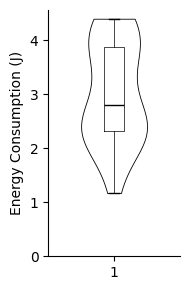

org.springframework.boot.rsocket.netty.NettyRSocketServerFactoryTests.tcpTransportBasicSslCertificateFromClassPathWithBundle 224
org.springframework.boot.rsocket.netty.NettyRSocketServerFactoryTests.testBasicSslWithPemCertificateFromBundle 309
org.springframework.boot.rsocket.netty.NettyRSocketServerFactory.create 161
org.springframework.boot.rsocket.netty.NettyRSocketServerFactory.createTransport 178
org.springframework.boot.rsocket.netty.NettyRSocketServerFactory.createTcpTransport 202
org.springframework.boot.rsocket.netty.NettyRSocketServerFactory$TcpSslServerCustomizer.apply 227
org.springframework.boot.web.embedded.netty.SslServerCustomizer.createSslContextSpec 64



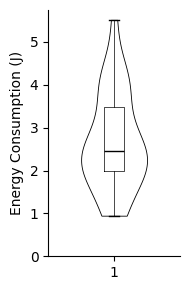

org.springframework.boot.SpringApplicationTests.customResourceLoaderFromConstructor 474
org.springframework.boot.SpringApplication.run 315
org.springframework.boot.SpringApplication.refreshContext 439
org.springframework.boot.SpringApplication.refresh 737
org.springframework.boot.web.servlet.context.ServletWebServerApplicationContext.refresh 146
org.springframework.boot.web.servlet.context.ServletWebServerApplicationContext.onRefresh 161
org.springframework.boot.web.servlet.context.ServletWebServerApplicationContext.createWebServer 181
org.springframework.boot.web.servlet.context.ServletWebServerApplicationContext.getWebServerFactory 218
org.springframework.boot.SpringApplicationTests$ExampleWebConfig.webServer 1599
org.springframework.boot.web.embedded.tomcat.TomcatServletWebServerFactory.<init> 129
org.springframework.boot.web.embedded.tomcat.TomcatServletWebServerFactory.getDefaultServerLifecycleListeners 181



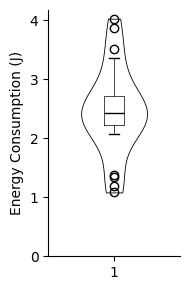

org.springframework.boot.web.servlet.context.XmlServletWebServerApplicationContextTests.createFromResource 44
org.springframework.boot.web.servlet.context.XmlServletWebServerApplicationContext.<init> 59
org.springframework.boot.web.servlet.context.XmlServletWebServerApplicationContext.load 112



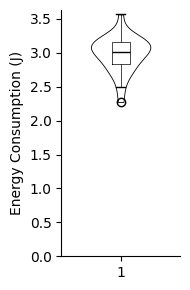

/home/jerome/Documents/Assistant/Recherche/joular-scripts/sentinel-notebook/utils2.py:316: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


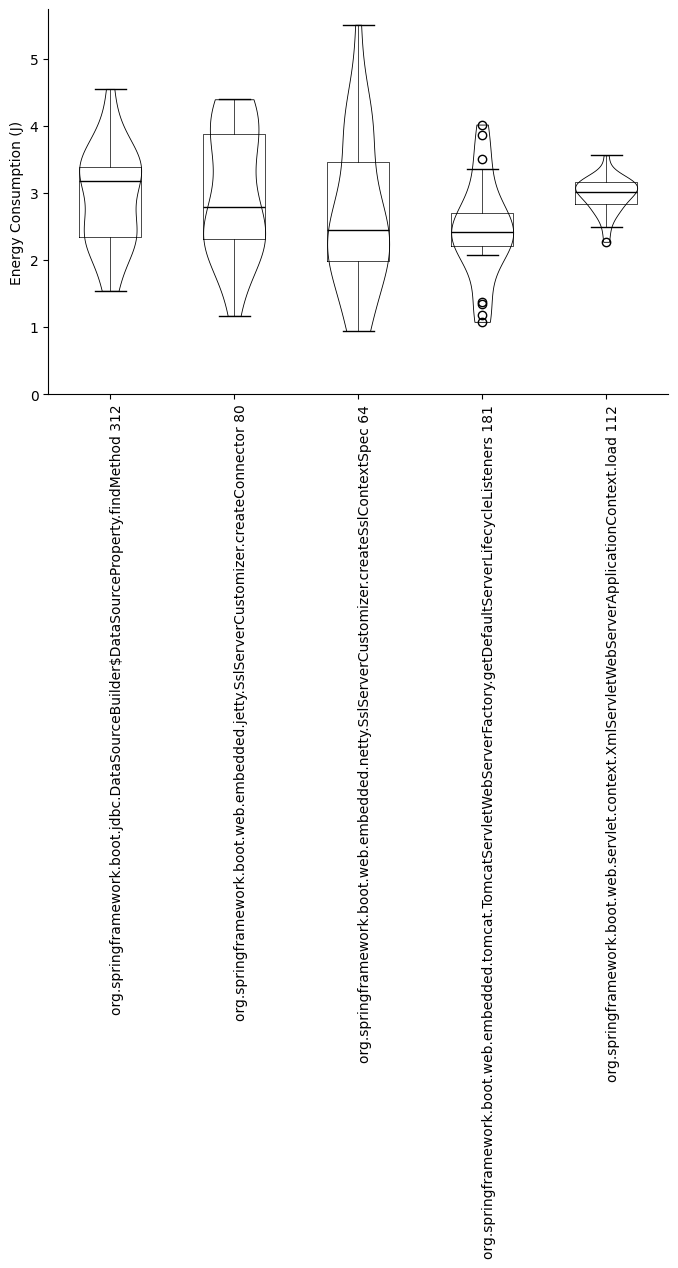

In [6]:
import importlib
import utils2
importlib.reload(utils2)
from utils2 import *

plot_quantile_data(all_normal_data_without_outliers, 17, highest=False, save=True)

### Fanout analysis

In [30]:
import importlib
import utils2
importlib.reload(utils2)
from utils2 import *

all_project_means = mean_dict(all_normal_data_without_outliers)

df = create_dataframe_metric_energy(all_normal_data_without_outliers, "spring-boot")

scatter_plot(df)

org.springframework.boot.AbstractApplicationEnvironmentTests.propertyResolverIsOptimizedForConfigurationProperties 59
org.springframework.boot.ApplicationEnvironmentTests.createEnvironment 30
org.springframework.boot.ApplicationEnvironment.<init> 29

org.springframework.boot.SpringApplicationTests.wildcardSources 744
org.springframework.boot.SpringApplication.run 314
org.springframework.boot.SpringApplication.prepareContext 417
org.springframework.boot.SpringApplication.load 682
org.springframework.boot.BeanDefinitionLoader.load 128
org.springframework.boot.BeanDefinitionLoader.load 129
org.springframework.boot.BeanDefinitionLoader.load 148
org.springframework.boot.BeanDefinitionLoader.load 192
org.springframework.boot.BeanDefinitionLoader.loadAsResources 206
org.springframework.boot.BeanDefinitionLoader.findResources 225

org.springframework.boot.context.properties.EnableConfigurationPropertiesRegistrarTests.registrationWithDuplicatedTypeShouldRegisterSingleBeanDefinition 88
org.sprin

## Spoon analysis

In [26]:
import importlib
import utils2
importlib.reload(utils2)
from utils2 import *

data_spoon = get_all_data_from_one_repo("spoon", 25, excluded_first_ancestor_class=" ")

-------------------------------------
Aggregation of the JoularNodeEntities
-------------------------------------
Number of documents : 43

---------------
Remove outliers
---------------
Len without outliers (with at least 25 values) :  40

-----------------
Shapiro-Wilk test
-----------------
Number of normal distributions :  31



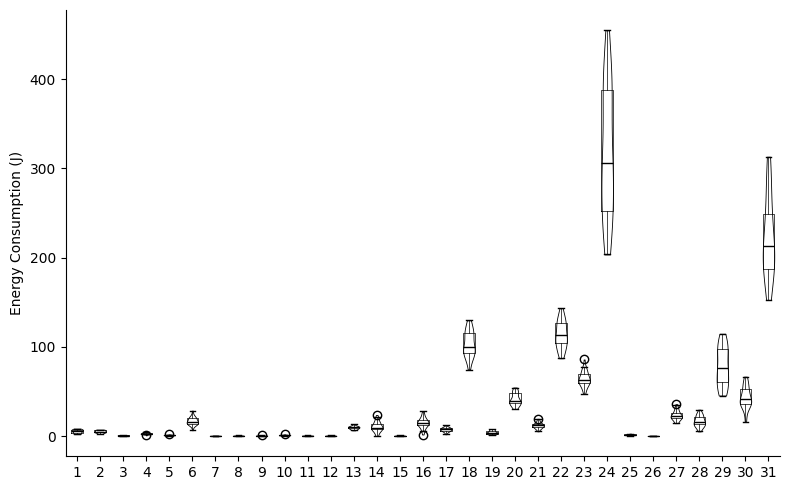

In [27]:
normal_values = [doc["values"] for doc in data_spoon]
#labels = [doc["measurableElement"]["classMethodSignature"] for doc in data_hibernate]
violin_and_boxplot(normal_values)

spoon.test.serializable.ModelStreamerTest.testLZMACompressionType 100
spoon.support.SerializationModelStreamer.save 50



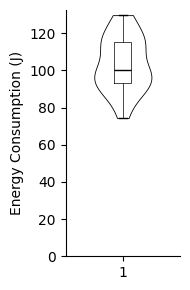

spoon.test.refactoring.CtRenameLocalVariableRefactoringTest.testRenameAllLocalVariablesOfRenameTestSubject 86
spoon.test.refactoring.CtRenameLocalVariableRefactoringTest.lambda$testRenameAllLocalVariablesOfRenameTestSubject$3 93
spoon.reflect.visitor.chain.CtQueryImpl.forEach 97
spoon.reflect.visitor.chain.CtQueryImpl$AbstractStep.accept 305
spoon.reflect.visitor.chain.CtQueryImpl$LazyFunctionWrapper._accept 490
spoon.reflect.visitor.filter.CtScannerFunction.apply 27
spoon.reflect.visitor.filter.CtScannerFunction.apply 57
spoon.reflect.visitor.EarlyTerminatingScanner.scan 121
spoon.reflect.visitor.EarlyTerminatingScanner.doScan 145
spoon.support.reflect.declaration.CtMethodImpl.accept 59
spoon.reflect.visitor.CtScanner.visitCtMethod 589
spoon.reflect.visitor.EarlyTerminatingScanner.scan 106
spoon.reflect.visitor.CtScanner.scan 184
spoon.reflect.visitor.EarlyTerminatingScanner.scan 121
spoon.reflect.visitor.EarlyTerminatingScanner.doScan 145
spoon.support.reflect.code.CtBlockImpl.accept

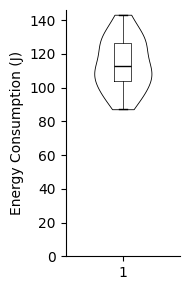

spoon.support.compiler.jdt.JDTBasedSpoonCompilerTest.testOrderCompilationUnits 35
spoon.support.compiler.jdt.JDTBasedSpoonCompiler.buildUnits 418
spoon.support.compiler.jdt.JDTBatchCompiler.getUnits 282
spoon.support.compiler.jdt.TreeBuilderCompiler.buildUnits 82



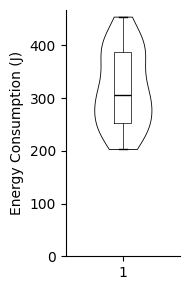

spoon.support.compiler.jdt.JDTImportBuilderTest.findunresolvedImport 70
spoon.support.compiler.jdt.JDTImportBuilderTest.setupImportStatement 94
spoon.support.compiler.jdt.JDTImportBuilderTest.setupImports 147



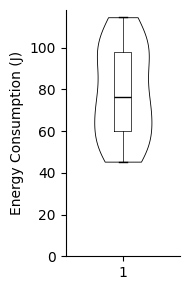

spoon.test.TemporaryDirectoryExecutionListener.executionStarted 42
spoon.test.TemporaryDirectoryExecutionListener.tryDelete 65



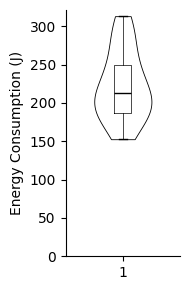

/home/jerome/Documents/Assistant/Recherche/joular-scripts/sentinel-notebook/utils2.py:367: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


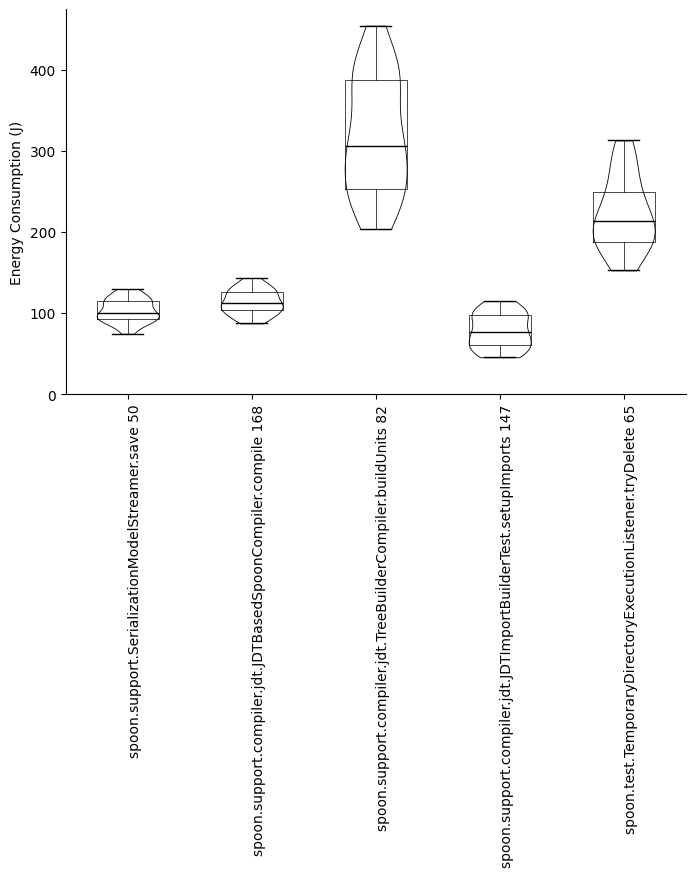

In [3]:
import importlib
import utils2
importlib.reload(utils2)
from utils2 import *

plot_quantile_data(data_spoon, 15, highest=True, save=True)

spoon.ContractVerifier.lambda$checkElementToPathToElementEquivalence$3 535
spoon.reflect.path.impl.CtPathImpl.toString 70
spoon.reflect.path.impl.CtRolePathElement.toString 49
spoon.reflect.path.CtRole.toString 187



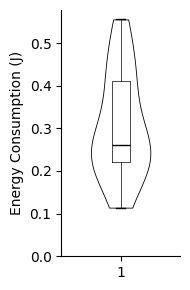

spoon.ContractVerifier.lambda$checkElementToPathToElementEquivalence$3 531
spoon.support.reflect.declaration.CtElementImpl.getPath 576
spoon.reflect.path.CtElementPathBuilder.fromElement 44
spoon.reflect.path.CtElementPathBuilder.fromElement 136
spoon.reflect.path.impl.AbstractPathElement.addArgument 35



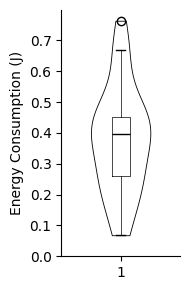

spoon.ContractVerifier.lambda$checkElementToPathToElementEquivalence$3 534
spoon.reflect.path.CtPathStringBuilder.fromString 113
spoon.reflect.path.impl.CtPathImpl.addLast 62



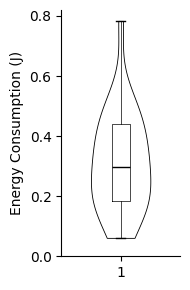

spoon.ContractVerifier.lambda$checkElementToPathToElementEquivalence$3 536
spoon.reflect.path.impl.CtPathImpl.evaluateOn 34
spoon.reflect.path.impl.CtRolePathElement.getElements 90
spoon.reflect.path.impl.CtNamedPathElement.scanElements 84
spoon.reflect.visitor.CtInheritanceScanner.scan 174



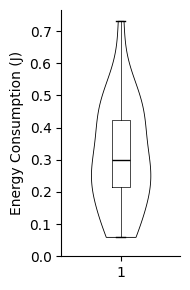

spoon.ContractVerifier.lambda$checkElementToPathToElementEquivalence$3 531
spoon.support.reflect.declaration.CtElementImpl.getPath 576
spoon.reflect.path.CtElementPathBuilder.fromElement 44
spoon.reflect.path.CtElementPathBuilder.fromElement 93
spoon.reflect.path.CtElementPathBuilder.getArg 166
spoon.reflect.path.CtElementPathBuilder.getSignature 177
spoon.support.reflect.declaration.CtExecutableImpl.getSignature 182
spoon.reflect.visitor.CtScanner.scan 194
spoon.support.reflect.declaration.CtConstructorImpl.accept 48
spoon.support.visitor.SignaturePrinter.visitCtConstructor 115
spoon.support.reflect.declaration.CtTypeImpl.getQualifiedName 866
spoon.support.reflect.declaration.CtTypeImpl.getPackage 438



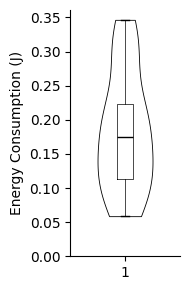

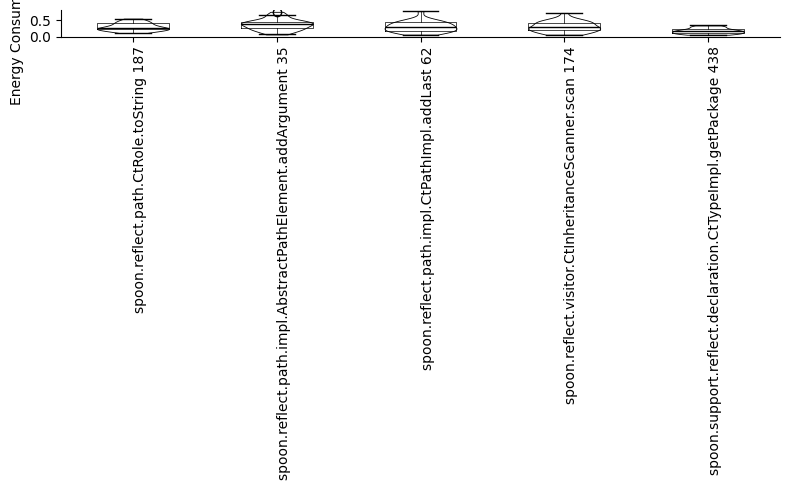

In [6]:
import importlib
import utils2
importlib.reload(utils2)
from utils2 import *

plot_quantile_data(data_spoon, 15, highest=False, save=True)

### Fanout analysis

In [29]:
import importlib
import utils2
importlib.reload(utils2)
from utils2 import *

all_project_means = mean_dict(data_spoon)
df = create_dataframe_metric_energy(data_spoon, "spoon")
scatter_plot(df)

spoon.MavenLauncherTest.testForceRefresh 194
spoon.MavenLauncher.<init> 58
spoon.MavenLauncher.<init> 127
spoon.MavenLauncher.init 214

spoon.support.compiler.jdt.JDTImportBuilderTest.setup 62
spoon.support.compiler.jdt.JDTImportBuilderTest.setupMockFactories 155
spoon.reflect.factory.CompilationUnitFactory.getOrCreate 169

spoon.ContractVerifier.lambda$checkElementToPathToElementEquivalence$3 536
spoon.reflect.path.impl.CtPathImpl.evaluateOn 34
spoon.reflect.path.impl.CtRolePathElement.getElements 111
spoon.reflect.path.impl.CtRolePathElement.getFromSet 53
spoon.reflect.meta.impl.SetHandler$1.iterator 57
spoon.reflect.meta.impl.SetHandler.iterator 109

spoon.ContractVerifier.lambda$checkElementToPathToElementEquivalence$3 534
spoon.reflect.path.CtPathStringBuilder.fromString 75
spoon.reflect.path.CtPathStringBuilder$Tokenizer.getNextToken 170

spoon.ContractVerifier.lambda$checkElementToPathToElementEquivalence$3 534
spoon.reflect.path.CtPathStringBuilder.fromString 105
spoon.reflect.

## Hibernate-orm

In [31]:
import importlib
import utils2
importlib.reload(utils2)
from utils2 import *

data_hibernate = get_all_data_from_one_repo("hibernate-orm", 25, excluded_first_ancestor_class=" ")

all_project_means = mean_dict(data_hibernate)
df = create_dataframe_metric_energy(data_hibernate, "hibernate-orm")
scatter_plot(df)

-------------------------------------
Aggregation of the JoularNodeEntities
-------------------------------------
Number of documents : 104

---------------
Remove outliers
---------------
Len without outliers (with at least 25 values) :  66

-----------------
Shapiro-Wilk test
-----------------
Number of normal distributions :  36

org.hibernate.testing.orm.junit.DomainModelExtension.postProcessTestInstance 112
org.hibernate.testing.orm.junit.DomainModelExtension.createDomainModelScope 238
org.hibernate.testing.orm.junit.DomainModelExtension$DomainModelScopeImpl.<init> 318
org.hibernate.testing.orm.junit.DomainModelExtension$DomainModelScopeImpl.createDomainModel 325
org.hibernate.testing.orm.junit.DomainModelExtension.lambda$createDomainModelScope$0 204
org.hibernate.boot.MetadataSources.addResource 331
org.hibernate.boot.jaxb.internal.UrlXmlSource.doBind 38
org.hibernate.boot.jaxb.internal.InputStreamXmlSource.doBind 43
org.hibernate.boot.jaxb.internal.AbstractBinder.bind 49
org.hib